## 선형회귀

In [69]:
## x,y값샘플제작

손든횟수=[1,2,3,1,1,3,1,3]
성적=[90,100,80,100,88,77,55,85]

import pandas as pd
df=pd.DataFrame(dict({'손든횟수':손든횟수, '성적':성적}))
df


,손든횟수,성적
0,1,90
1,2,100
2,3,80
3,1,100
4,1,88
5,3,77
6,1,55
7,3,85


### Part1. [단순선형회귀-최소제곱법계산식]
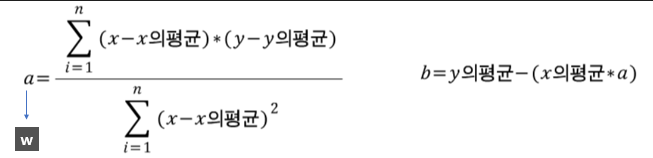

In [70]:
x=df['손든횟수'].values
y=df['성적'].values
x,y

(array([1, 2, 3, 1, 1, 3, 1, 3], dtype=int64),
 array([ 90, 100,  80, 100,  88,  77,  55,  85], dtype=int64))

In [71]:
## 2차원 array로 만들어주는 작업
import numpy as np
xdata = np.reshape(x, (-1,1))
xdata, np.shape(xdata)

(array([[1],
        [2],
        [3],
        [1],
        [1],
        [3],
        [1],
        [3]], dtype=int64),
 (8, 1))

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xdata, y)
model.coef_, model.intercept_

(array([-0.96363636]), 86.18181818181819)

### -- [작업1] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
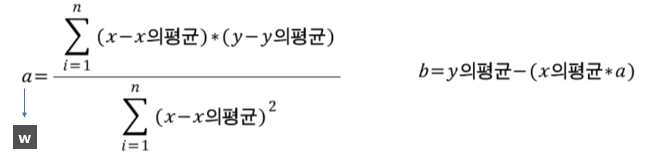

In [73]:
coef=np.sum((x-np.mean(x))*(y-np.mean(y))) / (np.sum((x-np.mean(x))**2))
coef

-0.9636363636363636

In [74]:
np.mean(y)-(np.mean(x)*coef)

86.18181818181819

### -- [작업2] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
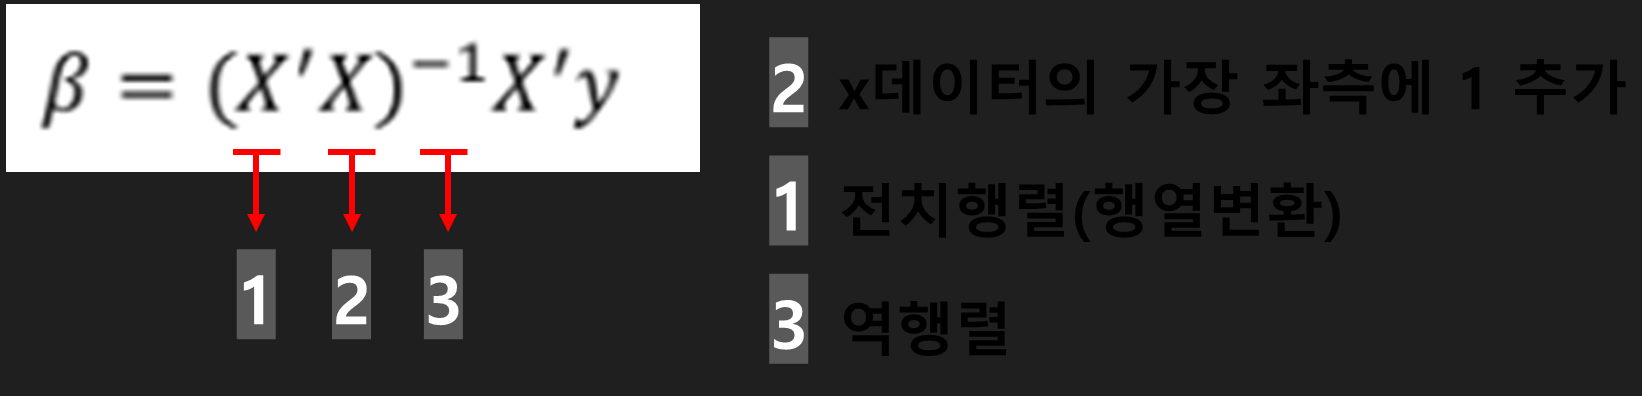

In [75]:
## 상수항 추가 작업 : b,w를 한개의 행렬로 계산하기 위해서 
newX = np.c_[np.ones(len(x)), x]
newX

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 1.],
       [1., 1.],
       [1., 3.],
       [1., 1.],
       [1., 3.]])

In [76]:
# 위의 수식 newX의 전치행렬 * newX
계산1 = np.dot(newX.T, newX)
계산1

array([[ 8., 15.],
       [15., 35.]])

In [77]:
#계산1의 역행렬
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1)  
계산1역행렬

array([[ 0.63636364, -0.27272727],
       [-0.27272727,  0.14545455]])

In [78]:
# 최종결과
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

## 최종결과가 위에꺼랑 똑같다. 


array([86.18181818, -0.96363636])

### Part2. [다중선형회귀_최소제곱법계산식]
- 위의 작업2방법으로 계산합니다.

In [79]:
df['공지확인횟수']=[1,2,20,7,8,1,2,3]
df

,손든횟수,성적,공지확인횟수
0,1,90,1
1,2,100,2
2,3,80,20
3,1,100,7
4,1,88,8
5,3,77,1
6,1,55,2
7,3,85,3


In [80]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values


In [81]:
# 사이킷런 모델에서 계산된값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.coef_, model.intercept_

## -1.17.. * x1 + 0.12.. * x2 + 85.87... => 최종 수식은 이런식으로 진행된다.


(array([-1.17727639,  0.12771958]), 85.87993553585818)

In [82]:
# 직접 계산한 최소제곱법
newX=np.c_[np.ones(len(x)),x]
계산1=np.dot(newX.T,newX)
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1) 
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

# 이값으로 해석하면 손든횟수가 많을수록 성적은 -1배 감소한다.
# 이값으로 해석하면 공지확인횟수가 많을수혹 성적은 0.1배 증가한다.



## -1.17.. * x1 + 0.12.. * x2 + 85.87... => 최종 수식은 이런식으로 진행된다.

array([85.87993554, -1.17727639,  0.12771958])

### 함수로 작업해보자.

In [92]:
class linear():
    def __init__(self):
        print('Linear를 실행하였습니다.')
         
    def fit(self,x,y):
        
        newX=np.c_[np.ones(len(x)),x]
        계산1=np.dot(newX.T,newX)
        np.random.seed(0)
        계산1역행렬= np.linalg.inv(계산1) 
        계산2=np.dot(계산1역행렬,newX.T)
        계산3=np.dot(계산2,y)
        return
    
    intercept=계산3[0]
    coef=계산3[1:]

In [93]:
df['공지확인횟수']=[1,2,20,7,8,1,2,3]
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values


mo = linear()
mo.fit(x,y)
mo.intercept, mo.coef

Linear를 실행하였습니다.


(85.87993553585812, array([-1.17727639,  0.12771958]))

In [94]:
손든횟수=[1,2,3,1,1,3,1,3]
성적=[90,100,80,100,88,77,55,85]
df=pd.DataFrame(dict({'손든횟수':손든횟수, '성적':성적}))
x=df['손든횟수'].values
y=df['성적'].values

mo = linear()
mo.fit(x,y)
mo.intercept, mo.coef

Linear를 실행하였습니다.


(85.87993553585812, array([-1.17727639,  0.12771958]))

In [96]:
df['공지확인횟수']=[1,2,20,7,8,1,2,3]
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values

- 예측값


In [ ]:
# 사이킷런 모델에서 계산된값 - 예측값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.predict(x)


array([84.83037873, 83.78082192, 84.90249799, 85.59669621, 85.72441579,
       82.47582595, 84.95809831, 82.73126511])

In [97]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values
a=linear()
# predict=a.coef[0]*x[:,0]+a.coef[1]*x[:,1]+a.intercept
predict=np.dot(a.coef, x.T)+a.intercept
predict

Linear를 실행하였습니다.


array([84.83037873, 83.78082192, 84.90249799, 85.59669621, 85.72441579,
       82.47582595, 84.95809831, 82.73126511])

- score

In [ ]:
model.score(x,y)

0.0073481528952500375

In [98]:
#### 내가 만든 스코어 
y_pred=model.predict(x)
y_true=y

u=((y_true-y_pred)**2).sum()
v=((y_true-y_true.mean())**2).sum()
score=1-(u/v)
score

0.0073481528952500375

### 최종 함수

In [100]:
class linear():
    # 클래스할땐 self 넣기
    def __init__(self):
        print('Linear를 실행하였습니다.')
    global intercept
    global coef

    def fit(self, x, y):
        newX=np.c_[np.ones(len(x)),x]
        계산1=np.dot(newX.T,newX)
        np.random.seed(0)
        계산1역행렬= np.linalg.inv(계산1) 
        계산2=np.dot(계산1역행렬,newX.T)
        계산3=np.dot(계산2,y)
        
    intercept = 계산3[0]
    coef = 계산3[1:]

    def predict(self, x):
        return np.dot(coef, x.T) + intercept
    
    def score(self, x,y):
        y_pred = self.predict(x)
        y_true = y

        u = ((y_true-y_pred)**2).sum()
        v = ((y_true-y_true.mean()**2)).sum()
        return 1-(u/v)

In [101]:
mo2 = linear()
mo2.fit(x,y)
mo2.score(x,y)
mo2.predict(x)

Linear를 실행하였습니다.


array([84.83037873, 83.78082192, 84.90249799, 85.59669621, 85.72441579,
       82.47582595, 84.95809831, 82.73126511])

## 회귀 모델 그리드 서치


In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd


In [106]:
##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([3, 5, 7, 10 ,12, 7, 13, 13, 12, 13, 12, 6])

##########데이터 분석

##########데이터 전처리

#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

##########모델 생성

model = Lasso()

##########모델 학습

##########모델 검증

print(model.get_params().keys()) #

param_grid = {
    'alpha': [0.5, 1, 1.5]
}
grid_search = GridSearchCV(model, param_grid=param_grid) 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2') 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=KFold(n_splits=5), scoring='r2') 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=make_scorer(r2_score))
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=KFold(n_splits=5), scoring=make_scorer(r2_score))

grid_search.fit(x_data, y_data)

print(grid_search.best_params_) #{'alpha': 0.5}
print(grid_search.best_score_) #-2.8938345053645973
df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by='mean_test_score', ascending=False)
print(df[['params', 'mean_test_score']])   
'''
           params  mean_test_score
0  {'alpha': 0.5}        -2.893835
1    {'alpha': 1}        -3.618589
2  {'alpha': 1.5}        -4.449471
'''

##########모델 예측

x_test = np.array([
    [4, 6]
])

best_model = grid_search.best_estimator_
y_predict = best_model.predict(x_test)

print(y_predict[0]) #8.279504382440336

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])
{'alpha': 0.5}
-2.893834505364599
           params  mean_test_score
0  {'alpha': 0.5}        -2.893835
1    {'alpha': 1}        -3.618589
2  {'alpha': 1.5}        -4.449471
8.34598670632434


## 모델저장 Pickle

- https://wikidocs.net/81873

In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import os

In [109]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')

In [110]:
##########데이터 분석

##########데이터 전처리

x_train = train_df.drop(['Son'], axis=1)
x_test = test_df.drop(['Son'], axis=1)
y_train = train_df['Son']
y_test = test_df['Son']

print(x_train.head())

    Father
0  165.100
1  165.100
2  167.132
3  155.194
4  160.020


In [111]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [112]:
##########모델 생성

model = LinearRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #0.251997790584662

0.24967004992776765
0.25199779058466176


### Pickle
- 입력 : pickle.dump(data, file)
- load : 변수 = pickle.load(file)

In [113]:
if not os.path.exists('models/son_height_regression_model'):
    os.makedirs('models/son_height_regression_model')

with open('models/son_height_regression_model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [114]:
##########모델 예측

x_test = np.array([
    [164.338]
])

y_predict = model.predict(x_test)

print(y_predict[0]) #169.66660924268297

170.46931035654347


### norm
- 벡터의 길이 또는 크기
- L1노름 
- L2노름 직선거리. 제곱근 단위

- https://bskyvision.com/entry/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99-%EB%86%88norm%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80

## 그라디언트 부스팅
- -> w,b를 계속 갱신함

#### LGBM 
- 그라디언트 부스팅은 속도가 굉장히 느려 보다 빠르게 만들어 낸 것
- 옵션값이 굉장히 많다. 
- 잘 맞추기 위한 정답은 없다.
- 옵션 값 = 파라미터
- 틀린 부분만 가중치를 더하면서 작업을 진행

#### XGboost
- 그라디언트 부스팅 중에서도 효과가 좋음. 오픈소스
- 옵션값들을 사용자가 찾아야 한다.
- 데이터 값 들이 나열되어 있을 때 
- 데이터중 일정 부분 뽑아서 관리하는데 복원 추출. 
- 중복해서 샘플데이터에 들어 갈 수 있다.
- 트리 구조. 엔트로피. 학습 필요
- 내부의 내용을 우리가 알 수 없음. 옵션 정도 밖에 수행할 수 없다

#### 앙상블
- 여러개 모델을 섞어서 표현하는 것
- https://wikidocs.net/42249\

#### 부스팅 모델
- https://wikidocs.net/44039
- https://wikidocs.net/26286
- https://wikidocs.net/26288


## 그리드 서치

- 어떤 모델을 써야할지 모를때 -> 여러개의 모델 사용 
- 여러가지 옵션 값들을 파라미터에 넣어두고 for를 안돌리는 기능 : 그리드 서치

- https://wikidocs.net/87220

- 랏쏘 모델로 먼저 돌리고 -> 그리드 서치에 넣기 (for 기능 수행x) -> 어떤 옵션값이 제일 잘 나왔는지 확인 -> 베스트 모델에 새로 생긴 데이터 넣어서 값을 예측하기


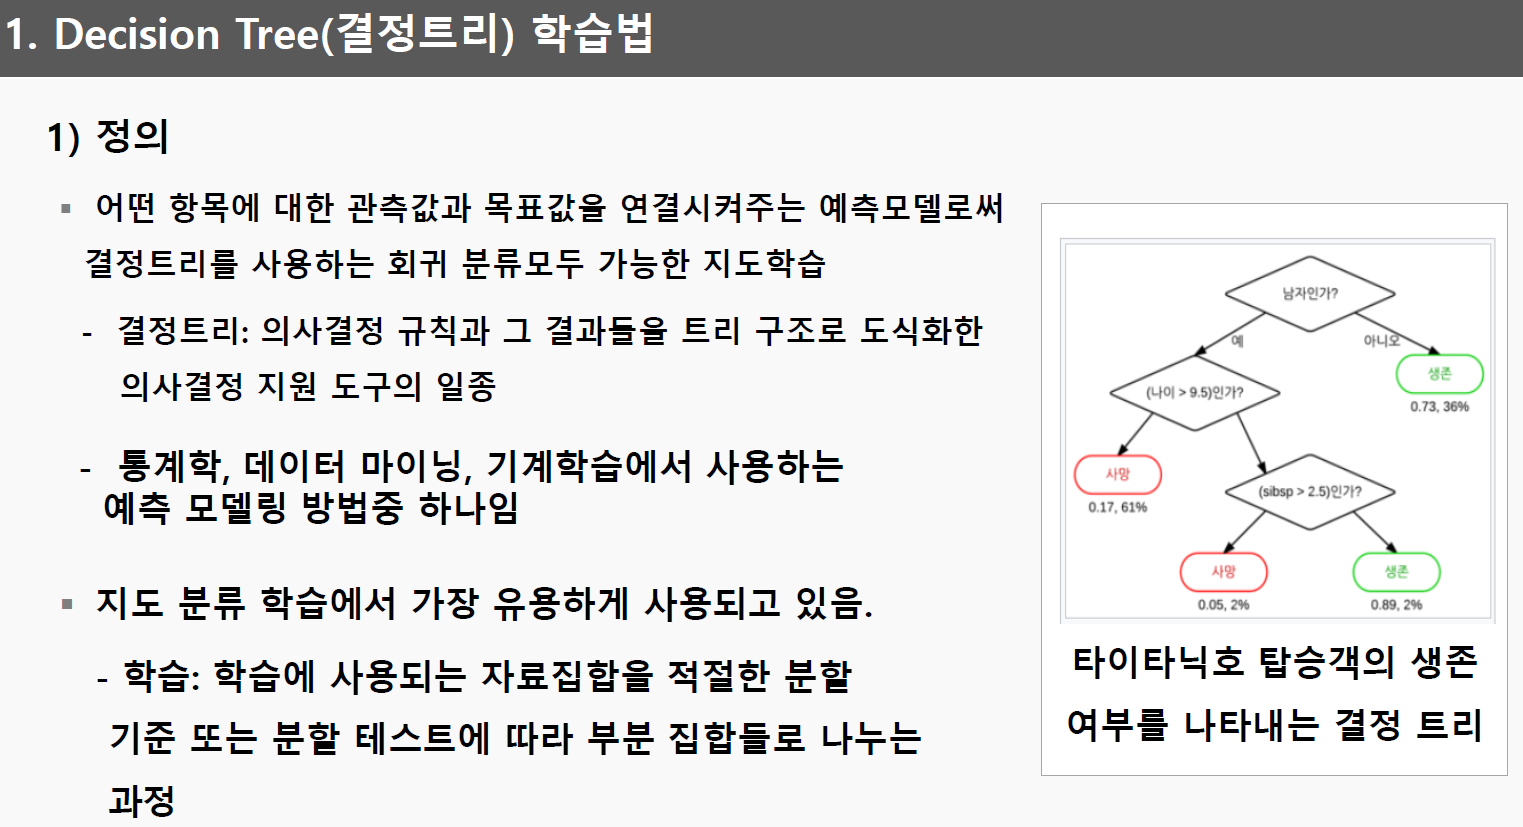

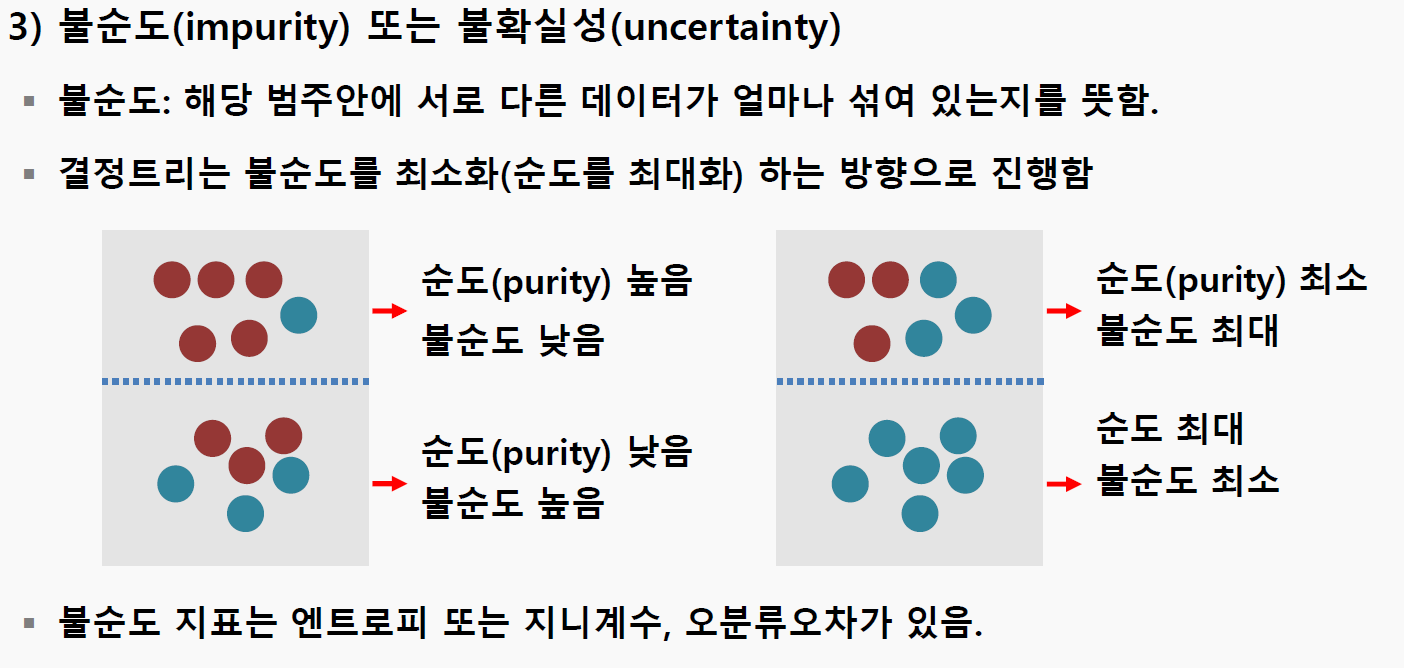
- 반반있을때 순도가 제일 나쁘다고함 ( 불순도가 높다)
- 우리반 기준 남학우, 여학우를 기준으로 잡는다면 한쪽은 남자만있으니깐 순도 최고라고함
- 50% 불순도 지표를 엔트로피 또는 지니계라고함
- 여러개있는건 랜덤 포레스트

- 엔트로피가 1이면 불순도 최고
- 엔트로피가 0이면 불순도 최소 

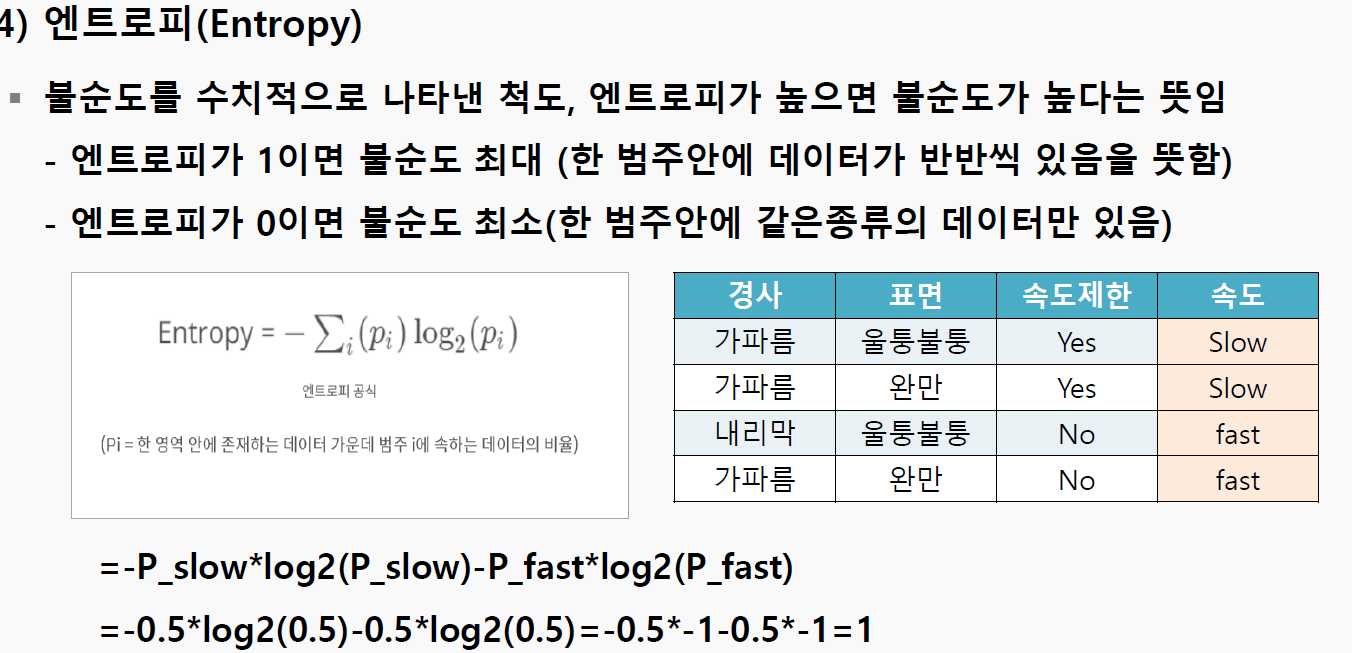
- 속도를 기준으로 반반일때 엔트로피가 1임

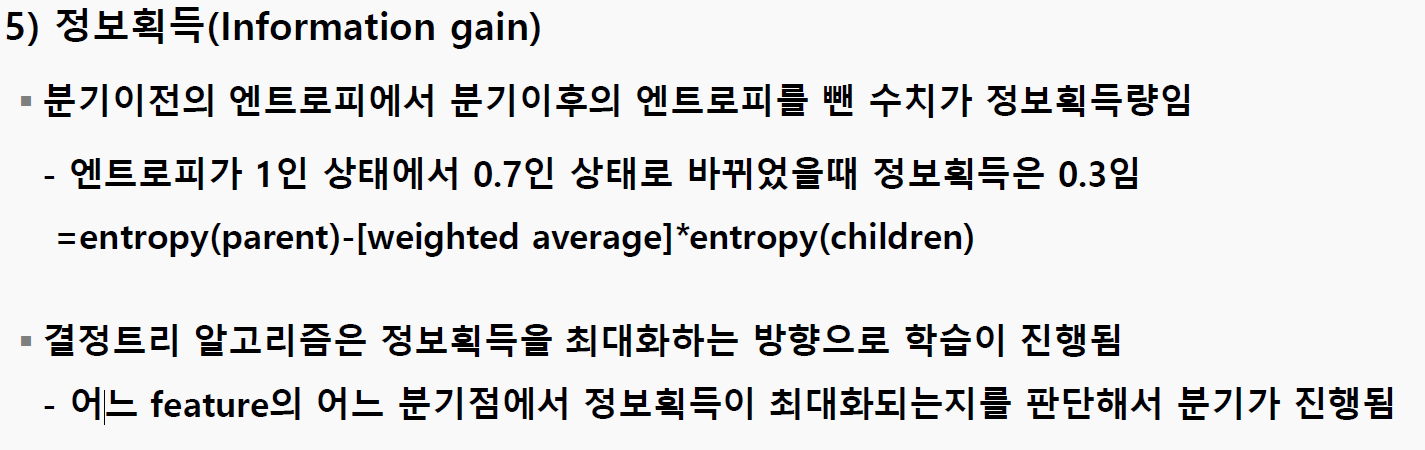
- 정보획득이 크면 클수록 좋은 분기임

- 교재 183P~
- 의사결정트리는 물건 맞추기와 비슷하다. 두가지 분류로 나누어서 질문을 하는데 가장 빠르게 나눌 수 있는 변수를 찾아내서 그 변수의 조건을 찾는게 의사결정의 목적이다.
- 왜 트리라고 하냐면 두갈래로 나눠지는게 가지가 뻗친 모습을 닮아서이다. 전산쪽에선 트리 구조의 데이터를 root Left Right leaf node로 부른다. degree를 읽는 데이터의 방향에 따라 방법론이 다르다.
 
- 공간확보를 해야하는 구조
- 트리구조 장점: 굉장히 빠르다. 분류만 명확하게 하면 잘라낼 수 있음.
- 단점 : 공간을 많이 차지한다
 
- 불순도 : 어떤상황이 됐건간에 한쪽이 데이터가 높은 것
- 반반 섞여있는게 순도가 제일 나쁨
- 불순도로 계산 되는 수치값 -> 엔트로피 또는 지니계수

- 랜덤포레스트는 이런 결정트리가 여러 개 있는 것

- 엔트로피 구하는 공식
 
- =-P_slow*log2(P_slow)-P_fast*log2(P_fast)
- =-0.5*log2(0.5)-0.5*log2(0.5)=-0.5*-1-0.5*-1=1 (경우의 수를 합산하는 것임)
- 어떻게 하든 엔트로피 개수를 다운시켜야 함(데이터의 불순도가 높다는 뜻이므로)
 
- 그전의 엔트로피에서 후의 엔트로피를 뺀 수치가 정보획득량임
- 크면 클수록 좋은 분기
 
 
#### [가지치기]
- è   depth(깊이)너무 깊으면 일을 너무 많이 함
- è   일정량을 못하게 막아버리는 가지치기를 하게 됨
- è   오버피팅을 막기 위한 전략
 
- 하나의 노드에는 최소한의 데이터가 들어가야 하며 사용자가 정할 수 있다.
- 트리 구조는 회귀도 되고 분류도 된다.
- 어떤 변수나 어떤 조건으로 트리를 나누냐에 따라 한번에 잘 나뉘기도 않기도 함
- 지니계수를 쓸건지 엔트로피를 쓸건지에 따라 값이 조금 다르게 나올 수 도 있음.
 
- 트리는 같은 데이터가 중복될 수 있다. 다시 꺼내는걸 복원추출이라고 함
